# An Analysis of Deaths from Malaria
#

# Introduction

## Malaria continues to kill hundreds of thousands of people each year

### According to the World Health Organisation (WHO): 
### "Over half a million people died from the disease in the 2010s. Most were children and the disease is one of the leading causes of child mortality". "In recent years, the vast majority of deaths from malaria occurred on the African continent"

### This analysis will look at deaths from malaria and aim to answer the following questions:

### 1. How do the number of deaths in Africa compare to those across the rest of the world? 
### 2. Which parts of Africa are most affected?
### 3. Has progress been made since 1990?
#
#
#



# Data Source Information

### World Deaths and causes over 30 years (1990 - 2019)

### This dataset comprises worldwide data for different causes of death by country for each of the years between 1990 and 2019.


### Dataset from Our World in Data (annual_deaths_by_causes.csv), downloaded 6th February 2024






# Load data



In [4]:
pip install a-world-of-countries

Defaulting to user installation because normal site-packages is not writeable
Looking in links: /usr/share/pip-wheels
Note: you may need to restart the kernel to use updated packages.


In [5]:
# import libraries for future use

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import awoc

In [6]:
# get list of African countries

world=awoc.AWOC()
africa = world.get_countries_list_of('Africa')

In [7]:
# read data into dataframe

df = pd.read_csv('annual_deaths_by_causes.csv')
df.head()

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
0,Afghanistan,AFG,2007,2933.0,1402.0,450.0,2488.0,393.0,2127.0,3657.0,...,4490.0,512.0,2439.0,1199.0,7425.0,7222.0,3346.0,6458.0,481.0,3437.0
1,Afghanistan,AFG,2008,2731.0,1424.0,455.0,2277.0,255.0,1973.0,3785.0,...,4534.0,495.0,2231.0,1092.0,7355.0,7143.0,3316.0,6408.0,462.0,3005.0
2,Afghanistan,AFG,2009,2460.0,1449.0,460.0,2040.0,239.0,1852.0,3874.0,...,4597.0,483.0,1998.0,1065.0,7290.0,7045.0,3291.0,6358.0,448.0,2663.0
3,Afghanistan,AFG,2011,2327.0,1508.0,473.0,1846.0,390.0,1775.0,4170.0,...,4785.0,483.0,1805.0,1525.0,7432.0,6916.0,3318.0,6370.0,448.0,2365.0
4,Afghanistan,AFG,2012,2254.0,1544.0,482.0,1705.0,94.0,1716.0,4245.0,...,4846.0,482.0,1667.0,3521.0,7494.0,6878.0,3353.0,6398.0,445.0,2264.0


## Exploratory Data Analysis

### This will be an initial look at the dataset to discover
### 1. Which causes of death are included in this dataset
### 2. How countries are identified


In [9]:
df.shape

(7273, 35)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7273 entries, 0 to 7272
Data columns (total 35 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   country                               7273 non-null   object 
 1   code                                  6206 non-null   object 
 2   year                                  7273 non-null   int64  
 3   meningitis                            6840 non-null   float64
 4   alzheimer's_diesease                  6840 non-null   float64
 5   parkinson's_disease                   6840 non-null   float64
 6   nutritional_deficiency                6840 non-null   float64
 7   malaria                               6840 non-null   float64
 8   drowning                              6840 non-null   float64
 9   interpersonal_violence                6840 non-null   float64
 10  maternal_disorders                    6840 non-null   float64
 11  hiv/aids         

In [11]:
# get list of columns
df.columns

Index(['country', 'code', 'year', 'meningitis', 'alzheimer's_diesease',
       'parkinson's_disease', 'nutritional_deficiency', 'malaria', 'drowning',
       'interpersonal_violence', 'maternal_disorders', 'hiv/aids',
       'drug_use_disorders', 'tuberculosis', 'cardiovascular_diseases',
       'lower_respiratory_infections', 'neonatal_disorders',
       'alcohol_use_disorders', 'self_harm', 'exposure_to_forces_of_nature',
       'diarrheal_diseases', 'environmental_heat_and_cold_exposure',
       'neoplasms', 'conflict_and_terrorism', 'diabetes_mellitus',
       'chronic_kidney_disease', 'poisonings', 'protein_energy_malnutrition',
       'terrorism', 'road_injuries', 'chronic_respiratory_diseases',
       'chronic_liver_diseases', 'digestive_diseases',
       'fire_heat_hot_substance', 'acute_hepatitis'],
      dtype='object')

### There are 35 columns of data which include 32 different causes of death
### There are 7273 rows of data

In [13]:
# get list of countries
df['country'].unique()

array(['Afghanistan', 'African Region (WHO)', 'Albania', 'Algeria',
       'American Samoa', 'Andorra', 'Angola', 'Antigua and Barbuda',
       'Argentina', 'Armenia', 'Australasia & Oceania', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bermuda',
       'Bhutan', 'Bolivia', 'Bosnia and Herzegovina',
       'Bosnia-Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria',
       'Burkina Faso', 'Burundi', 'Cambodia', 'Cameroon', 'Canada',
       'Cape Verde', 'Central African Republic',
       'Central America & Caribbean', 'Central Asia', 'Chad', 'Chile',
       'China', 'Colombia', 'Comoros', 'Congo', 'Cook Islands',
       'Costa Rica', "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus',
       'Czechia', 'Czechoslovakia', 'Democratic Republic of Congo',
       'Denmark', 'Djibouti', 'Dominica', 'Dominican Republic',
       'East Asia', 'East Asia & Pacific (WB)', 'East Germany (GDR)',
       

## This data contains some sub-total rows including 'Africa Region (WHO)', plus a row for 'World'.


### First, I will separate the data for 'World' and for 'African Region (WHO)' and look at how Malaria deaths in Africa compare to the World data.  





In [15]:
# create new dataframe with World data

df_world_data = df[df['country']=='World']
df_world_data



,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
7005,World,OWID_WRL,1990,432524.0,560935.0,147238.0,757152.0,840553.0,460665.0,373124.0,...,601307.0,88000.0,656314.0,7148.0,1113411.0,3093755.0,1012975.0,1855372.0,123213.0,166405.0
7006,World,OWID_WRL,1991,428900.0,583499.0,150955.0,729479.0,859283.0,454574.0,384328.0,...,613969.0,87858.0,631330.0,8429.0,1117666.0,3149299.0,1027439.0,1878516.0,124037.0,165338.0
7007,World,OWID_WRL,1992,426722.0,606241.0,154979.0,700996.0,856695.0,447255.0,407830.0,...,630556.0,88474.0,606325.0,9742.0,1126217.0,3208851.0,1043531.0,1904767.0,125091.0,163749.0
7008,World,OWID_WRL,1993,421104.0,629938.0,160345.0,674537.0,862512.0,445641.0,433541.0,...,647662.0,90073.0,584222.0,NaN,1138091.0,3267665.0,1068326.0,1940585.0,127585.0,161946.0
7009,World,OWID_WRL,1994,414064.0,652551.0,164474.0,650113.0,855983.0,443548.0,442677.0,...,665781.0,90937.0,564338.0,7690.0,1154304.0,3298371.0,1089924.0,1968709.0,129705.0,159482.0
7010,World,OWID_WRL,1995,410088.0,675206.0,168976.0,723386.0,862940.0,437488.0,444969.0,...,684135.0,90395.0,641362.0,6103.0,1163463.0,3314399.0,1104987.0,1985322.0,128616.0,157222.0
7011,World,OWID_WRL,1996,417495.0,697074.0,173920.0,672263.0,872785.0,423478.0,433394.0,...,705064.0,88899.0,594098.0,6966.0,1163484.0,3343716.0,1115851.0,1996581.0,126892.0,153459.0
7012,World,OWID_WRL,1997,401124.0,717759.0,179448.0,647966.0,893230.0,413586.0,428051.0,...,731502.0,87408.0,572638.0,10924.0,1170473.0,3383022.0,1129580.0,2015735.0,126360.0,151946.0
7013,World,OWID_WRL,1998,393598.0,739206.0,185199.0,620761.0,901666.0,407388.0,432739.0,...,759156.0,86719.0,549803.0,4688.0,1178491.0,3402606.0,1142133.0,2031693.0,124834.0,149613.0
7014,World,OWID_WRL,1999,390356.0,762078.0,191651.0,593679.0,894094.0,397349.0,441394.0,...,785874.0,87371.0,527676.0,3393.0,1195982.0,3420830.0,1159185.0,2055304.0,126022.0,147069.0


In [16]:
# Create new dataframe with Africa data

df_africa_data = df[df['country']=='African Region (WHO)']
df_africa_data

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
30,African Region (WHO),NaN,1990,172206.0,24312.0,6573.0,215934.0,588508.0,27182.0,50714.0,...,64609.0,17453.0,208628.0,NaN,130403.0,123351.0,119201.0,198446.0,19552.0,17666.0
31,African Region (WHO),NaN,1991,174087.0,25173.0,6754.0,216068.0,607330.0,27357.0,52671.0,...,66230.0,17461.0,208785.0,NaN,132658.0,125505.0,121587.0,202452.0,19696.0,17844.0
32,African Region (WHO),NaN,1992,178190.0,26141.0,6988.0,217480.0,620445.0,27469.0,56013.0,...,68274.0,17712.0,210192.0,NaN,136413.0,128229.0,124268.0,207105.0,20040.0,18069.0
33,African Region (WHO),NaN,1993,179299.0,27051.0,7182.0,217090.0,638935.0,27435.0,59415.0,...,69626.0,17734.0,209852.0,NaN,136847.0,129724.0,126184.0,210463.0,20066.0,18164.0
34,African Region (WHO),NaN,1994,178971.0,28014.0,7414.0,215874.0,650973.0,27428.0,58643.0,...,71447.0,17835.0,208675.0,NaN,139782.0,132378.0,128478.0,214555.0,20307.0,18447.0
35,African Region (WHO),NaN,1995,181068.0,28896.0,7628.0,213775.0,668983.0,27334.0,59011.0,...,72963.0,17862.0,206636.0,NaN,142066.0,134766.0,130830.0,218580.0,20343.0,18793.0
36,African Region (WHO),NaN,1996,196542.0,29893.0,7886.0,210452.0,688268.0,27045.0,60209.0,...,74777.0,17815.0,203405.0,NaN,143610.0,137669.0,133001.0,222476.0,20342.0,19003.0
37,African Region (WHO),NaN,1997,186353.0,30890.0,8162.0,207241.0,708186.0,27287.0,61570.0,...,77039.0,18037.0,200289.0,NaN,148113.0,140773.0,135612.0,227076.0,20682.0,19258.0
38,African Region (WHO),NaN,1998,186059.0,31883.0,8386.0,204485.0,726403.0,27224.0,64521.0,...,78881.0,18097.0,197634.0,NaN,151827.0,143155.0,138302.0,231909.0,21022.0,19560.0
39,African Region (WHO),NaN,1999,188150.0,32834.0,8559.0,200991.0,743180.0,27200.0,66899.0,...,80166.0,18195.0,194314.0,NaN,154153.0,143858.0,140632.0,236196.0,21093.0,19735.0


In [17]:
# merge World data and Africa data into a new dataframe

df_merge = pd.merge(df_world_data, df_africa_data, on='year', how = 'inner')

df_merge

,country_x,code_x,year,meningitis_x,alzheimer's_diesease_x,parkinson's_disease_x,nutritional_deficiency_x,malaria_x,drowning_x,interpersonal_violence_x,...,chronic_kidney_disease_y,poisonings_y,protein_energy_malnutrition_y,terrorism_y,road_injuries_y,chronic_respiratory_diseases_y,chronic_liver_diseases_y,digestive_diseases_y,fire_heat_hot_substance_y,acute_hepatitis_y
0,World,OWID_WRL,1990,432524.0,560935.0,147238.0,757152.0,840553.0,460665.0,373124.0,...,64609.0,17453.0,208628.0,NaN,130403.0,123351.0,119201.0,198446.0,19552.0,17666.0
1,World,OWID_WRL,1991,428900.0,583499.0,150955.0,729479.0,859283.0,454574.0,384328.0,...,66230.0,17461.0,208785.0,NaN,132658.0,125505.0,121587.0,202452.0,19696.0,17844.0
2,World,OWID_WRL,1992,426722.0,606241.0,154979.0,700996.0,856695.0,447255.0,407830.0,...,68274.0,17712.0,210192.0,NaN,136413.0,128229.0,124268.0,207105.0,20040.0,18069.0
3,World,OWID_WRL,1993,421104.0,629938.0,160345.0,674537.0,862512.0,445641.0,433541.0,...,69626.0,17734.0,209852.0,NaN,136847.0,129724.0,126184.0,210463.0,20066.0,18164.0
4,World,OWID_WRL,1994,414064.0,652551.0,164474.0,650113.0,855983.0,443548.0,442677.0,...,71447.0,17835.0,208675.0,NaN,139782.0,132378.0,128478.0,214555.0,20307.0,18447.0
5,World,OWID_WRL,1995,410088.0,675206.0,168976.0,723386.0,862940.0,437488.0,444969.0,...,72963.0,17862.0,206636.0,NaN,142066.0,134766.0,130830.0,218580.0,20343.0,18793.0
6,World,OWID_WRL,1996,417495.0,697074.0,173920.0,672263.0,872785.0,423478.0,433394.0,...,74777.0,17815.0,203405.0,NaN,143610.0,137669.0,133001.0,222476.0,20342.0,19003.0
7,World,OWID_WRL,1997,401124.0,717759.0,179448.0,647966.0,893230.0,413586.0,428051.0,...,77039.0,18037.0,200289.0,NaN,148113.0,140773.0,135612.0,227076.0,20682.0,19258.0
8,World,OWID_WRL,1998,393598.0,739206.0,185199.0,620761.0,901666.0,407388.0,432739.0,...,78881.0,18097.0,197634.0,NaN,151827.0,143155.0,138302.0,231909.0,21022.0,19560.0
9,World,OWID_WRL,1999,390356.0,762078.0,191651.0,593679.0,894094.0,397349.0,441394.0,...,80166.0,18195.0,194314.0,NaN,154153.0,143858.0,140632.0,236196.0,21093.0,19735.0


In [18]:
# calculate new columns as number of malaria deaths outside Africa and percentage of malaria deaths in Africa

df_merge['malaria_notafrica'] = df_merge['malaria_x'] - df_merge['malaria_y']

df_merge['pcent'] = (df_merge['malaria_y'] / df_merge['malaria_x'] ) * 100

# print out to check correct
print (df_merge[['year','malaria_x','malaria_y','malaria_notafrica','pcent']])


    year  malaria_x  malaria_y  malaria_notafrica      pcent
0   1990   840553.0   588508.0           252045.0  70.014383
1   1991   859283.0   607330.0           251953.0  70.678694
2   1992   856695.0   620445.0           236250.0  72.423091
3   1993   862512.0   638935.0           223577.0  74.078390
4   1994   855983.0   650973.0           205010.0  76.049758
5   1995   862940.0   668983.0           193957.0  77.523698
6   1996   872785.0   688268.0           184517.0  78.858825
7   1997   893230.0   708186.0           185044.0  79.283723
8   1998   901666.0   726403.0           175263.0  80.562315
9   1999   894094.0   743180.0           150914.0  83.121014
10  2000   882382.0   763846.0           118536.0  86.566362
11  2001   913037.0   793502.0           119535.0  86.907979
12  2002   929531.0   804507.0           125024.0  86.549776
13  2003   960008.0   835458.0           124550.0  87.026150
14  2004   961129.0   841388.0           119741.0  87.541631
15  2005   940883.0   83

#  Between 1990 and 2019 an increasing percentage of all Malaria deaths occurred in Africa

## In 1990 70.0% of deaths from Malaria were in Africa. By 2019 this had reached 91.7%, although actual numbers have been falling since 2007.


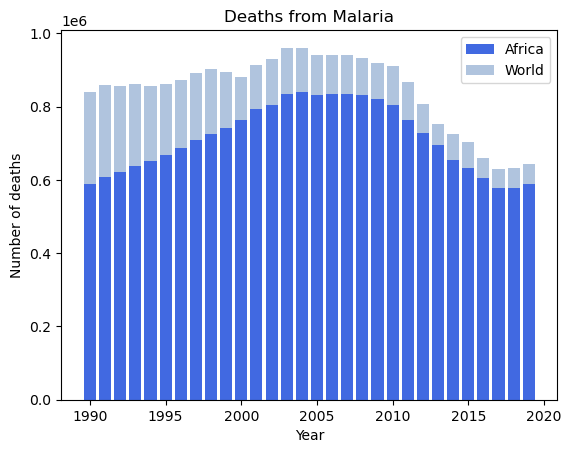

In [20]:
# Can now plot a single bar chart showing Malaria deaths per year, within Afica compared to Wordwide

# This in done by showing Africa data underneath'outside Africa'. ( to avoid counting Africa twice)

fig, ax=plt.subplots()

plt.bar('year','malaria_y',data = df_merge,label = 'Africa',color='royalblue')

plt.bar('year','malaria_notafrica',data = df_merge, bottom = df_merge['malaria_y'], label = 'World', color = 'lightsteelblue')

plt.title('Deaths from Malaria')
plt.xlabel('Year')
plt.ylabel('Number of deaths')
plt.legend()

plt.show()




## This bar chart shows how the number of Malaria deaths has changed from 1990 - 2019
### It is clear that Africa has accounted for an increasing share of Malaria deaths during this time

In [22]:
# use the 'africa' list of countries to create new dataframe with data for only African countries

africa_df = df[df['country'].isin(africa)]

africa_df

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
90,Algeria,DZA,1990,838.0,1337.0,439.0,453.0,9.0,1207.0,491.0,...,3559.0,485.0,422.0,3.0,13438.0,4410.0,2401.0,3981.0,1113.0,486.0
91,Algeria,DZA,1991,794.0,1411.0,451.0,439.0,9.0,1136.0,484.0,...,3640.0,469.0,408.0,42.0,13120.0,4481.0,2456.0,4033.0,1078.0,478.0
92,Algeria,DZA,1992,763.0,1494.0,470.0,427.0,12.0,1111.0,497.0,...,3687.0,464.0,396.0,236.0,13115.0,4571.0,2500.0,4083.0,1071.0,472.0
93,Algeria,DZA,1993,736.0,1582.0,488.0,417.0,12.0,1092.0,513.0,...,3741.0,461.0,386.0,NaN,13154.0,4668.0,2542.0,4136.0,1067.0,470.0
94,Algeria,DZA,1994,708.0,1675.0,509.0,402.0,8.0,1086.0,553.0,...,3806.0,460.0,370.0,500.0,13326.0,4773.0,2588.0,4193.0,1095.0,469.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7268,Zimbabwe,ZWE,2015,1439.0,754.0,215.0,3019.0,2518.0,770.0,1302.0,...,2108.0,381.0,2990.0,NaN,2373.0,2751.0,1956.0,4202.0,632.0,146.0
7269,Zimbabwe,ZWE,2016,1457.0,767.0,219.0,3056.0,2050.0,801.0,1342.0,...,2160.0,393.0,3027.0,NaN,2436.0,2788.0,1962.0,4264.0,648.0,146.0
7270,Zimbabwe,ZWE,2017,1460.0,781.0,223.0,2990.0,2116.0,818.0,1363.0,...,2196.0,398.0,2962.0,0.0,2473.0,2818.0,2007.0,4342.0,654.0,144.0
7271,Zimbabwe,ZWE,2018,1450.0,795.0,227.0,2918.0,2088.0,825.0,1396.0,...,2240.0,400.0,2890.0,NaN,2509.0,2849.0,2030.0,4377.0,657.0,139.0


# Further analysis will look at Africa only
### Is number of deaths from Malaria correlated to number of deaths from any other diseases?



In [24]:
# look at correlations between Malaria and other causes of death
corr_df = africa_df.select_dtypes(include='number').corr()

malaria = corr_df[['malaria']]


# output correlations in descending order
malaria.sort_values('malaria',ascending=False)


,malaria
malaria,1.000000
meningitis,0.920264
diarrheal_diseases,0.897502
lower_respiratory_infections,0.889853
neonatal_disorders,0.868097
maternal_disorders,0.791527
alcohol_use_disorders,0.726118
poisonings,0.711990
environmental_heat_and_cold_exposure,0.681788
acute_hepatitis,0.673967


### Within Africa, deaths from Malaria are highly correlated with deaths from Meningitis, Diarrhoea, Lower Respiratory Infections, Neonatal Disorders and Maternal Disorders

### It is likely that these diseases also have a disproportionally high impact upon young children and their mothers

## Now find number of malaria deaths for each country within Africa


In [27]:
# calculate total number of Malaria deaths for each country

df_africa_sum = africa_df.groupby(['country'])['malaria'].sum()

df_africa_sum.sort_values(ascending=False)

country
Nigeria                     6422063.0
Uganda                      1265629.0
Burkina Faso                 950762.0
Mozambique                   817948.0
Tanzania                     800490.0
Ghana                        721339.0
Mali                         711087.0
Niger                        693962.0
Cameroon                     614095.0
Ethiopia                     453985.0
Malawi                       404288.0
Sierra Leone                 394491.0
Guinea                       362660.0
Burundi                      320767.0
Angola                       317069.0
Benin                        316834.0
Senegal                      313661.0
Kenya                        303684.0
Zambia                       205529.0
Madagascar                   202088.0
Rwanda                       198066.0
Chad                         195599.0
South Sudan                  166774.0
Togo                         160123.0
Liberia                      145813.0
Central African Republic     134706.0
Soma

### The greatest number of deaths from Malaria have been recorded in Nigeria, Uganda, Burkina Faso, Mozambique and Tanzania (this is total number of deaths between 1990 and 2019)

### Nigeria is the most populated country in Africa, so it's place at the top of the list may be due to population size

### It is interesting to note that the countries which recorded no malaria deaths, or very few (<100) were around the Sahara (Algeria, Libya, Egypt, Morocco and Tunisia) or island nations (Cape Verde, Seychelles and Mauritius). The exception is Lesotho. The World Health Organisation certified Lesotho as malaria-free in 2012.

## Now look at data for Nigeria
### Bar charts will show the pattern of disease from 1990 to 2019 for Malaria, and also for the other four diseases most closely correlated with Malaria

In [30]:
# create new dataframe for Nigeria

df_nigeria = africa_df[africa_df['country']=='Nigeria']

# rows for Nigeria are not in date order - sort now
df_nigeria = df_nigeria.sort_values('year')
df_nigeria

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
4378,Nigeria,NGA,1990,40226.0,4984.0,1431.0,10236.0,148931.0,2887.0,6579.0,...,11660.0,2937.0,9769.0,NaN,11832.0,17749.0,25713.0,43375.0,2876.0,4292.0
4379,Nigeria,NGA,1991,41349.0,5107.0,1460.0,10517.0,157502.0,2977.0,7140.0,...,11928.0,2908.0,10039.0,10.0,12185.0,17994.0,26125.0,44145.0,2948.0,4475.0
4380,Nigeria,NGA,1992,42711.0,5255.0,1496.0,10624.0,165722.0,3071.0,7951.0,...,12257.0,3007.0,10141.0,135.0,12663.0,18313.0,26664.0,45145.0,3037.0,4628.0
4381,Nigeria,NGA,1993,44166.0,5395.0,1528.0,10693.0,173695.0,3165.0,8438.0,...,12536.0,3107.0,10210.0,NaN,13082.0,18594.0,27081.0,46006.0,3133.0,4666.0
4382,Nigeria,NGA,1994,45460.0,5540.0,1557.0,11053.0,180588.0,3256.0,7467.0,...,12756.0,3189.0,10552.0,15.0,13421.0,18837.0,27378.0,46688.0,3205.0,4825.0
4383,Nigeria,NGA,1995,46492.0,5654.0,1578.0,11401.0,186263.0,3313.0,7634.0,...,12887.0,3252.0,10874.0,1.0,13667.0,19031.0,27473.0,47083.0,3265.0,5022.0
4384,Nigeria,NGA,1996,59006.0,5754.0,1592.0,11568.0,191437.0,3367.0,7900.0,...,13000.0,3296.0,11029.0,24.0,13879.0,19112.0,27460.0,47296.0,3307.0,5067.0
4385,Nigeria,NGA,1997,48278.0,5894.0,1614.0,11913.0,197467.0,3417.0,8586.0,...,13176.0,3362.0,11351.0,107.0,14199.0,19311.0,27746.0,47939.0,3365.0,5178.0
4386,Nigeria,NGA,1998,50009.0,6041.0,1637.0,12155.0,202843.0,3478.0,8500.0,...,13336.0,3438.0,11574.0,9.0,14574.0,19542.0,28018.0,48666.0,3435.0,5246.0
4387,Nigeria,NGA,1999,50499.0,6186.0,1661.0,12206.0,207571.0,3528.0,9369.0,...,13492.0,3503.0,11614.0,134.0,14916.0,19824.0,28428.0,49645.0,3489.0,5219.0


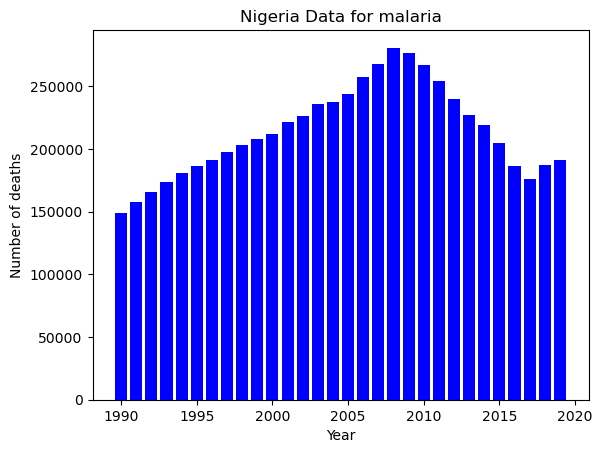

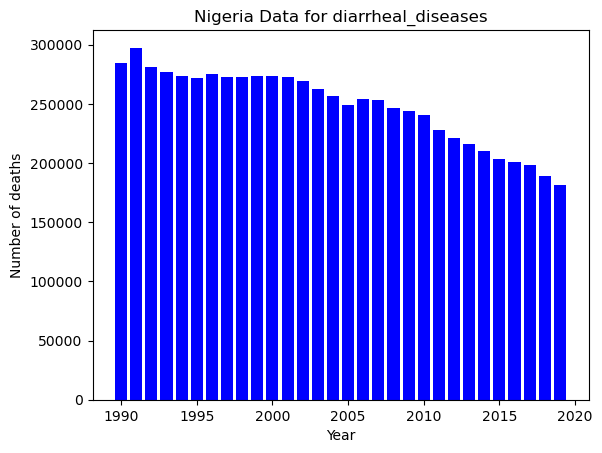

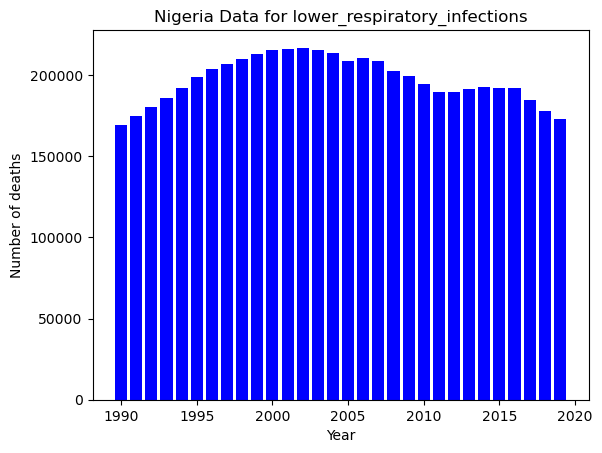

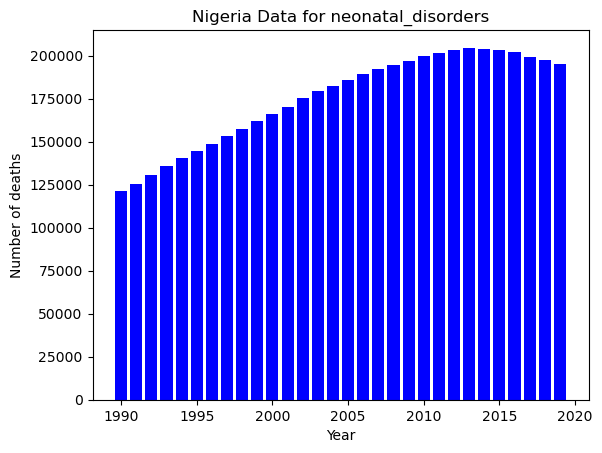

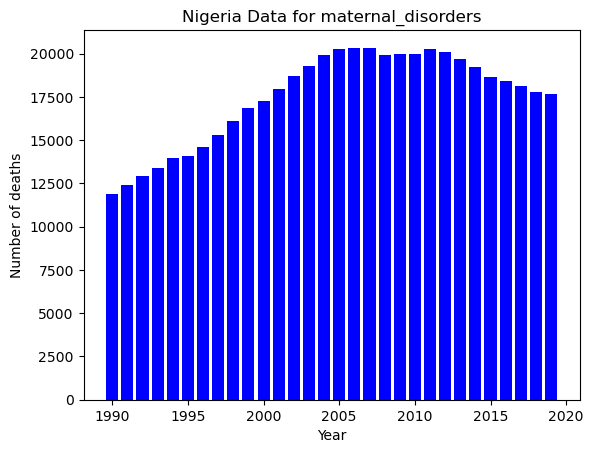

In [31]:
chosen_causes = ['malaria','diarrheal_diseases','lower_respiratory_infections','neonatal_disorders','maternal_disorders']


for cause in chosen_causes:
    plt.bar(df_nigeria['year'],df_nigeria[cause], color='blue')
    plt.title(f'Nigeria Data for {cause}')
    plt.xlabel('Year')
    plt.ylabel('Number of deaths')
    plt.show()

## Now look at Uganda
                 

In [33]:
# create new dataframe for Uganda

df_uganda = africa_df[africa_df['country']=='Uganda']

# rows for Nigeria are not in date order - sort now
df_uganda = df_uganda.sort_values('year')
df_uganda

,country,code,year,meningitis,alzheimer's_diesease,parkinson's_disease,nutritional_deficiency,malaria,drowning,interpersonal_violence,...,chronic_kidney_disease,poisonings,protein_energy_malnutrition,terrorism,road_injuries,chronic_respiratory_diseases,chronic_liver_diseases,digestive_diseases,fire_heat_hot_substance,acute_hepatitis
6584,Uganda,UGA,1990,5804.0,681.0,176.0,7948.0,44242.0,604.0,847.0,...,1546.0,404.0,7771.0,84.0,2771.0,4164.0,3010.0,5074.0,445.0,243.0
6585,Uganda,UGA,1991,6002.0,708.0,183.0,8220.0,45260.0,634.0,927.0,...,1638.0,425.0,8036.0,2.0,2991.0,4334.0,3163.0,5342.0,464.0,262.0
6586,Uganda,UGA,1992,6149.0,732.0,188.0,8304.0,45783.0,646.0,968.0,...,1693.0,436.0,8118.0,2.0,3100.0,4416.0,3235.0,5479.0,474.0,272.0
6587,Uganda,UGA,1993,6565.0,757.0,194.0,8357.0,46646.0,640.0,1032.0,...,1768.0,450.0,8167.0,NaN,3278.0,4532.0,3350.0,5683.0,487.0,288.0
6588,Uganda,UGA,1994,6150.0,783.0,200.0,8244.0,47282.0,675.0,1102.0,...,1843.0,460.0,8053.0,22.0,3455.0,4626.0,3470.0,5889.0,496.0,304.0
6589,Uganda,UGA,1995,6239.0,809.0,205.0,8185.0,48279.0,682.0,1170.0,...,1910.0,471.0,7992.0,145.0,3628.0,4691.0,3581.0,6080.0,506.0,319.0
6590,Uganda,UGA,1996,6374.0,835.0,211.0,8101.0,49681.0,700.0,1238.0,...,1982.0,484.0,7908.0,413.0,3822.0,4748.0,3708.0,6294.0,518.0,338.0
6591,Uganda,UGA,1997,6506.0,859.0,217.0,7932.0,51172.0,706.0,1282.0,...,2035.0,492.0,7744.0,239.0,3950.0,4749.0,3803.0,6450.0,527.0,354.0
6592,Uganda,UGA,1998,6650.0,883.0,223.0,7694.0,52982.0,711.0,1486.0,...,2110.0,505.0,7511.0,81.0,4130.0,4765.0,3925.0,6656.0,539.0,376.0
6593,Uganda,UGA,1999,6699.0,907.0,230.0,7374.0,54562.0,713.0,1772.0,...,2164.0,509.0,7197.0,75.0,4232.0,4734.0,3997.0,6768.0,543.0,394.0


## Visualise the deaths from Malaria, plus the other four diseases

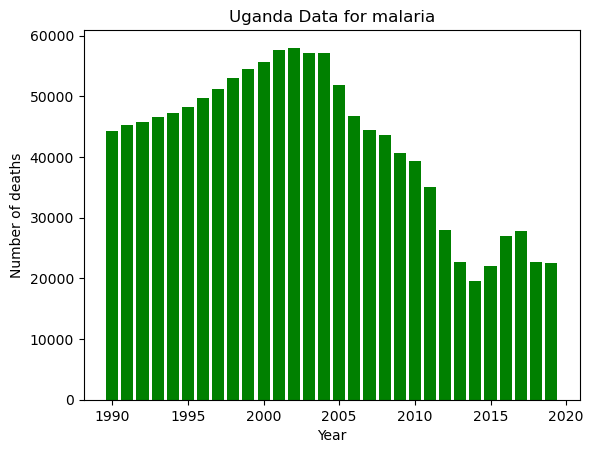

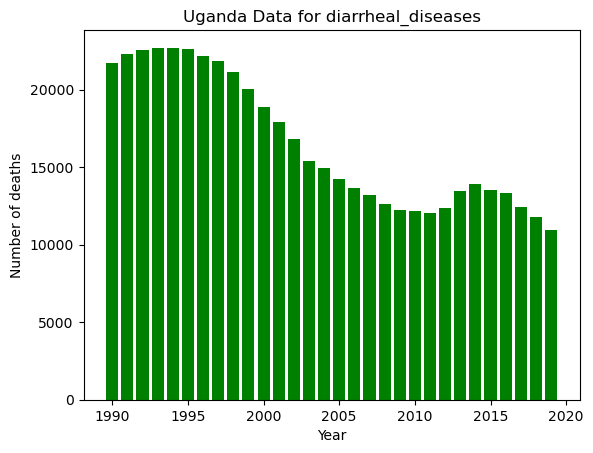

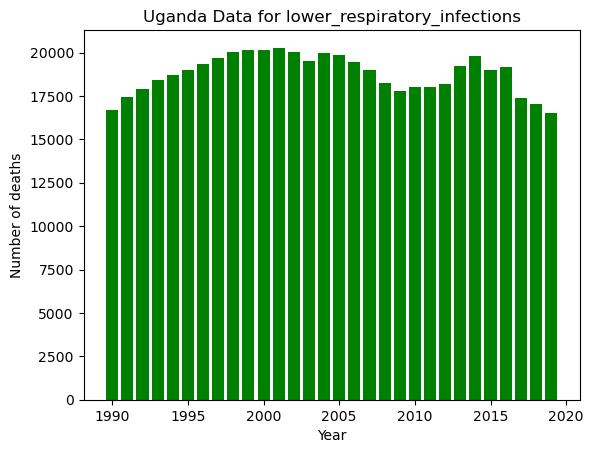

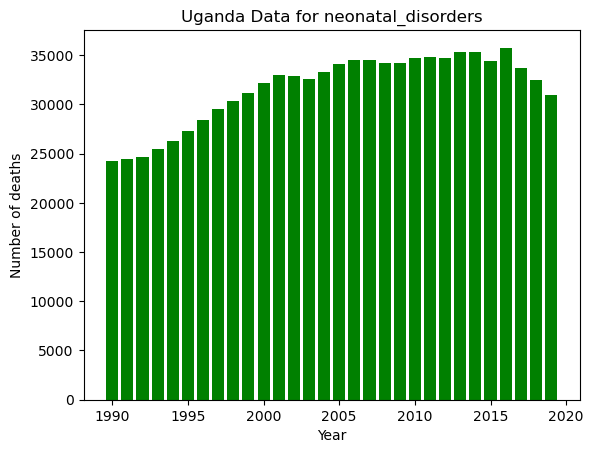

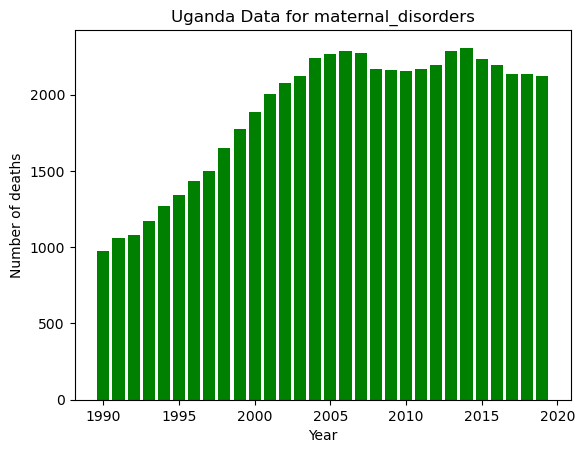

In [35]:
chosen_causes = ['malaria','diarrheal_diseases','lower_respiratory_infections','neonatal_disorders','maternal_disorders']


for cause in chosen_causes:
    plt.bar(df_uganda['year'],df_uganda[cause], color='green')
    plt.title(f'Uganda Data for {cause}')
    plt.xlabel('Year')
    plt.ylabel('Number of deaths')
    plt.show()

### In both Nigeria and Uganda deaths from neonatal and maternal disorders have been rising

### The number of deaths will be skewed by population size, therefore it is difficult to compare countries.
### In 2022 the population of Nigeria was 218 million, whereas Uganda's population was 47 million.
### For Nigeria and Uganda I will look at the percentage of deaths from malaria, using the total number of deaths from all causes as the base.

In [38]:
# calculate total deaths for Uganda country, and percentage caused by malaria
uganda_pcent_df = df_uganda.copy()

# add up all columns, apart from first 3 (=country, code, year)
uganda_pcent_df['TOTAL'] = uganda_pcent_df.iloc[:,3:].sum(axis=1)

# add column for %deaths caused by malaria
uganda_pcent_df['pcent malaria'] = (uganda_pcent_df['malaria'] / uganda_pcent_df['TOTAL']) * 100

print (uganda_pcent_df[['country','year','malaria','TOTAL','pcent malaria']])

     country  year  malaria     TOTAL  pcent malaria
6584  Uganda  1990  44242.0  267654.0      16.529549
6585  Uganda  1991  45260.0  279975.0      16.165729
6586  Uganda  1992  45783.0  286914.0      15.957046
6587  Uganda  1993  46646.0  295908.0      15.763683
6588  Uganda  1994  47282.0  302235.0      15.644118
6589  Uganda  1995  48279.0  309000.0      15.624272
6590  Uganda  1996  49681.0  316743.0      15.684956
6591  Uganda  1997  51172.0  320962.0      15.943320
6592  Uganda  1998  52982.0  325733.0      16.265469
6593  Uganda  1999  54562.0  328258.0      16.621682
6594  Uganda  2000  55586.0  330821.0      16.802440
6595  Uganda  2001  57652.0  331896.0      17.370502
6596  Uganda  2002  57993.0  330389.0      17.552945
6597  Uganda  2003  57135.0  326346.0      17.507492
6598  Uganda  2004  57092.0  327057.0      17.456284
6599  Uganda  2005  51905.0  314903.0      16.482853
6600  Uganda  2006  46798.0  300988.0      15.548128
6601  Uganda  2007  44507.0  293664.0      15.

<function matplotlib.pyplot.show(close=None, block=None)>

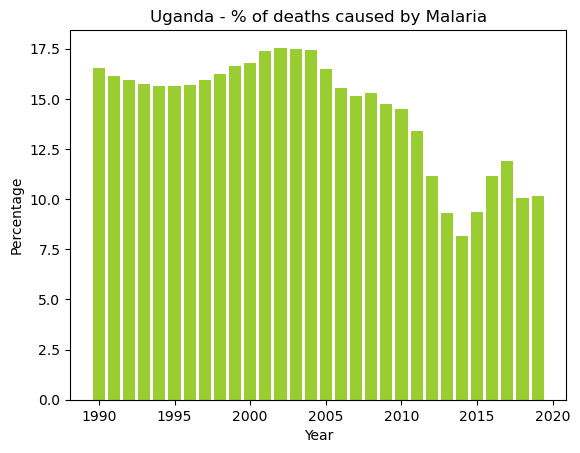

In [39]:
plt.bar(uganda_pcent_df['year'],uganda_pcent_df['pcent malaria'], color = 'yellowgreen')

plt.title('Uganda - % of deaths caused by Malaria')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show

In [40]:
# calculate same for Nigeria
nigeria_pcent_df = df_nigeria.copy()

# add up all columns, apart from first 3 (=country, code, year)
nigeria_pcent_df['TOTAL'] = nigeria_pcent_df.iloc[:,3:].sum(axis=1)

# add column for %deaths caused by malaria
nigeria_pcent_df['pcent malaria'] = (nigeria_pcent_df['malaria'] / nigeria_pcent_df['TOTAL']) * 100

print (nigeria_pcent_df[['country','year','malaria','TOTAL','pcent malaria']])

      country  year   malaria      TOTAL  pcent malaria
4378  Nigeria  1990  148931.0  1169882.0      12.730429
4379  Nigeria  1991  157502.0  1215101.0      12.962050
4380  Nigeria  1992  165722.0  1235700.0      13.411184
4381  Nigeria  1993  173695.0  1267130.0      13.707749
4382  Nigeria  1994  180588.0  1299980.0      13.891598
4383  Nigeria  1995  186263.0  1331943.0      13.984307
4384  Nigeria  1996  191437.0  1378453.0      13.887815
4385  Nigeria  1997  197467.0  1397465.0      14.130372
4386  Nigeria  1998  202843.0  1432393.0      14.161128
4387  Nigeria  1999  207571.0  1469547.0      14.124829
4388  Nigeria  2000  212123.0  1499222.0      14.148872
4389  Nigeria  2001  221139.0  1523202.0      14.518035
4390  Nigeria  2002  226408.0  1543128.0      14.672017
4391  Nigeria  2003  235380.0  1553850.0      15.148180
4392  Nigeria  2004  236937.0  1555326.0      15.233912
4393  Nigeria  2005  243827.0  1547426.0      15.756941
4394  Nigeria  2006  257505.0  1574546.0      16

<function matplotlib.pyplot.show(close=None, block=None)>

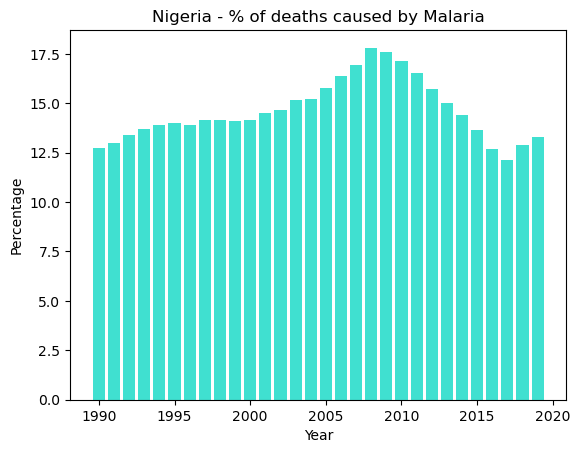

In [41]:
plt.bar(nigeria_pcent_df['year'],nigeria_pcent_df['pcent malaria'], color = 'turquoise')

plt.title('Nigeria - % of deaths caused by Malaria')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.show

### 

## Now compare the percentage of malaria deaths for Nigeria and Uganda from 1990 to 2019

<function matplotlib.pyplot.show(close=None, block=None)>

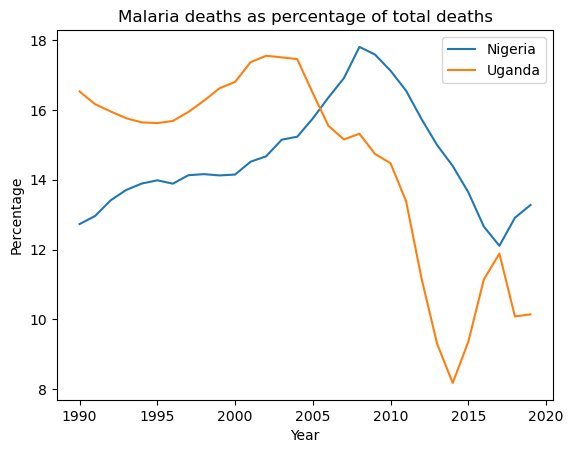

In [44]:
plt.plot(nigeria_pcent_df['year'],nigeria_pcent_df['pcent malaria'],label='Nigeria')
plt.plot(uganda_pcent_df['year'],uganda_pcent_df['pcent malaria'],label='Uganda')

plt.title('Malaria deaths as percentage of total deaths')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.show

### Note that this graph only shows percentages between 8-18% which magnifies the changes compared to the bar charts above
## Nigeria and Uganda have both seen a fall in the impact of malaria.
### There was a spike in malaria deaths in Uganda between 2014 and 2017 increasing from 8% to 12% over this 3-year period. This is supported by data from The National Center for Biotechnology which has information on "the 2015-2016 malaria epidemic in Northern Uganda".

## Now look at the percentage of deaths from malaria in all African countries

### This is an average across the 30-year period and does not take account of the year-on-year fluctuations. It will however help to identify the countries suffering the highest mortality rates from malaria during this time.

In [48]:
# calculate country totals for malaria and total deaths
# make copy of Africa dataframe 

malaria_data = africa_df.copy()


# add up all columns, apart from first 3 (=country, code, year)
malaria_data['TOTAL'] = malaria_data.iloc[:,3:].sum(axis=1)

# group by country to get country totals

malaria_data_sum = malaria_data.groupby(['country'])[['malaria','TOTAL']].sum()

malaria_data_sum['% malaria'] = (malaria_data_sum['malaria'] / malaria_data_sum['TOTAL']) * 100

malaria_data_sum.sort_values('% malaria',ascending = False)



,malaria,TOTAL,% malaria
country,,,
Sierra Leone,394491.0,1968192.0,20.043319
Burkina Faso,950762.0,4869401.0,19.525235
Liberia,145813.0,968217.0,15.059950
Uganda,1265629.0,8577906.0,14.754522
Nigeria,6422063.0,43692688.0,14.698256
Benin,316834.0,2170343.0,14.598338
Mali,711087.0,4934265.0,14.411204
Equatorial Guinea,28215.0,198007.0,14.249496
Niger,693962.0,4892853.0,14.183177


### Although Nigeria has the highest number of deaths from malaria it falls behind Sierra Leone, Burkina Faso, Liberia and Uganda when we look at the percentage of malaria deaths compared to the total number of deaths.

### With the exception of Uganda, the 12 countries with the highest percentage of malaria deaths all lie in the west of Africa to the south of the Sahara.

###
### Now I will exclude Nigeria and Uganda (already considered, see line graph above) and plot the data for the other countries among these 12. This will show how malaria deaths fluctuate between 1990 and 2019 (it will be messy!)

<function matplotlib.pyplot.show(close=None, block=None)>

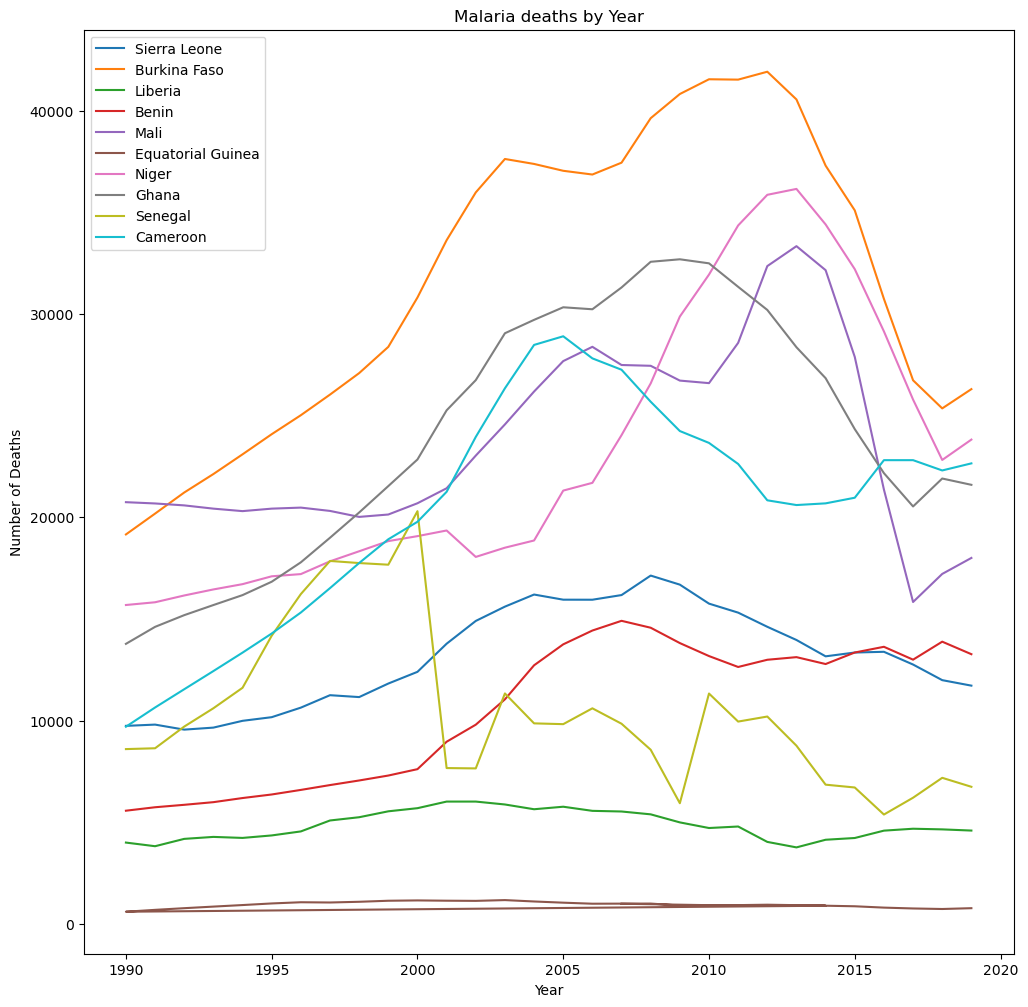

In [72]:
# line graph with percentage of malaria deaths from 1990-2019

countries = ['Sierra Leone','Burkina Faso','Liberia','Benin','Mali','Equatorial Guinea','Niger','Ghana','Senegal','Cameroon']
    
plt.figure(figsize=(12,12))

for entry in countries :

    plt.plot(africa_df[africa_df['country']==entry]['year'],africa_df[africa_df['country']==entry]['malaria'],label=entry)
    
plt.title('Malaria deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show


### A simpler version showing just the countries with a marked peak for deaths

<function matplotlib.pyplot.show(close=None, block=None)>

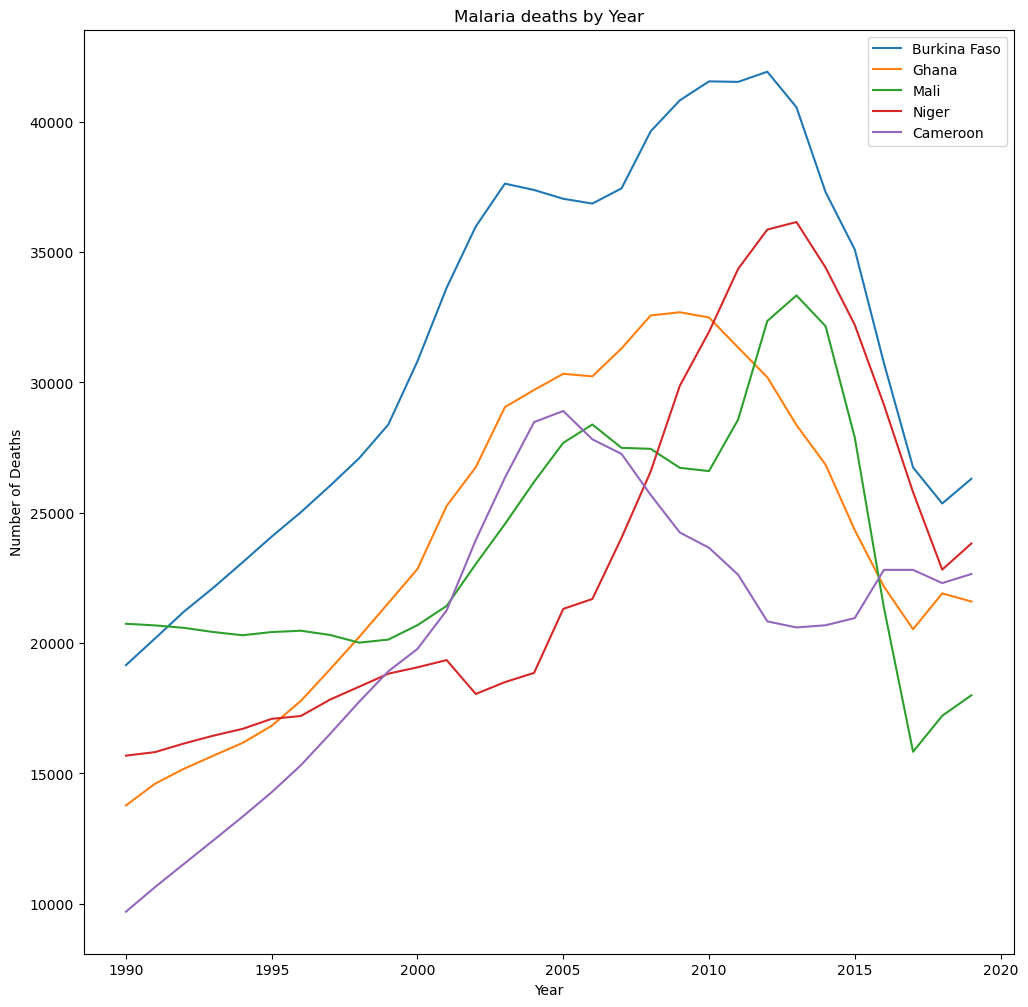

In [52]:
countries2 = ['Burkina Faso','Ghana','Mali','Niger','Cameroon']

plt.figure(figsize=(12,12))

for entry in countries2 :

    plt.plot(africa_df[africa_df['country']==entry]['year'],africa_df[africa_df['country']==entry]['malaria'],label=entry)
    
plt.title('Malaria deaths by Year')
plt.xlabel('Year')
plt.ylabel('Number of Deaths')
plt.legend()
plt.show


### In Equatorial Guinea and Liberia the number of deaths from malaria have been fairly consistent. Numbers in Equatorial Guinea are very low.
### In Sierra Leonne, following a steady rise until around 2008 numbers are now falling. 
### In Benin numbers rose until 2007 and are now fairly stable.
### In Cameroon, following a peak in 2006 numbers fell and are now fairly stable.
### In Burkina Faso, Niger, Mali and Ghana numbers rose steeply until around 2013 but then fell significantly.
### In Senegal numbers are erratic. According to the Institut Pasteur there was a dramatic drop in malaria cases in 2000 following the introduction of preventative measures including rapid diagnosis, new therapies and the use of impregnated mosquito nets. However, this has reduced immunity within the population and the people of Senegal are therefore vulnerable to outbreaks of the disease.

#
#
# Conclusion

### This analysis looked at deaths from malaria with the aim to answer the following questions:

### 1. How do the number of deaths in Africa compare to those across the rest of the world? 
### Africa now accounts for most of the malaria deaths worldwide (over 90%) and this share has increased over the period 1990-2019.
### 2. Which parts of Africa are most affected?
### Malaria has the highest impact in the west of Africa to the south of the Sahara, though some countries in this region appear to have malaria under control.
### 3. Has progress been made since 1990?
### This brief look at the data shows that there has been progress. The number of malaria deaths in the most affected African countries is falling or stable. Africa's population is increasing by 2% each year therefore it is good news that the number of deaths from malaria is not increasing. It is predicted that by 2050 2 in 5 children will be born in Africa (World Economic Forum). Since malaria has a disproportionate impact on young children the development of new therapies and vaccines is an urgent priority.
# 
#
# "Nearly every minute a child under 5 dies of malaria."
# "This translates to a daily toll of over 1000 children under 5 years old."  
# (UNICEF, 2022)


